In [30]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import mplhep
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
from scipy.optimize import curve_fit
from utils.components import unique_name_ext_re
mplhep.style.use(["LHCbTex2"])
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [31]:
file = uproot.open(
    "/work/cetin/Projektpraktikum/tracking_losses_ntuple_B_rad_length_endVelo2endUT.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
electrons = allcolumns[(allcolumns.isElectron) & (allcolumns.fromB)]

ak.num(electrons, axis=0)
# ak.count(found, axis=None)

50501

In [32]:
# electrons.type.show()

In [33]:
found = electrons[~electrons.lost]
lost = electrons[electrons.lost]

eloss_found = (found["p"] - found["p_end_scifi"]) / found["p"]
eloss_lost = (lost["p"] - lost["p_end_scifi"]) / lost["p"]

eloss = (electrons["p"] - electrons["p_end_scifi"]) / electrons["p"]

In [34]:
# eloss_upstream_found = (found["p"] - found["p_end_ut"]) / found["p"]
# eloss_upstream_lost = (lost["p"] - lost["p_end_ut"]) / lost["p"]

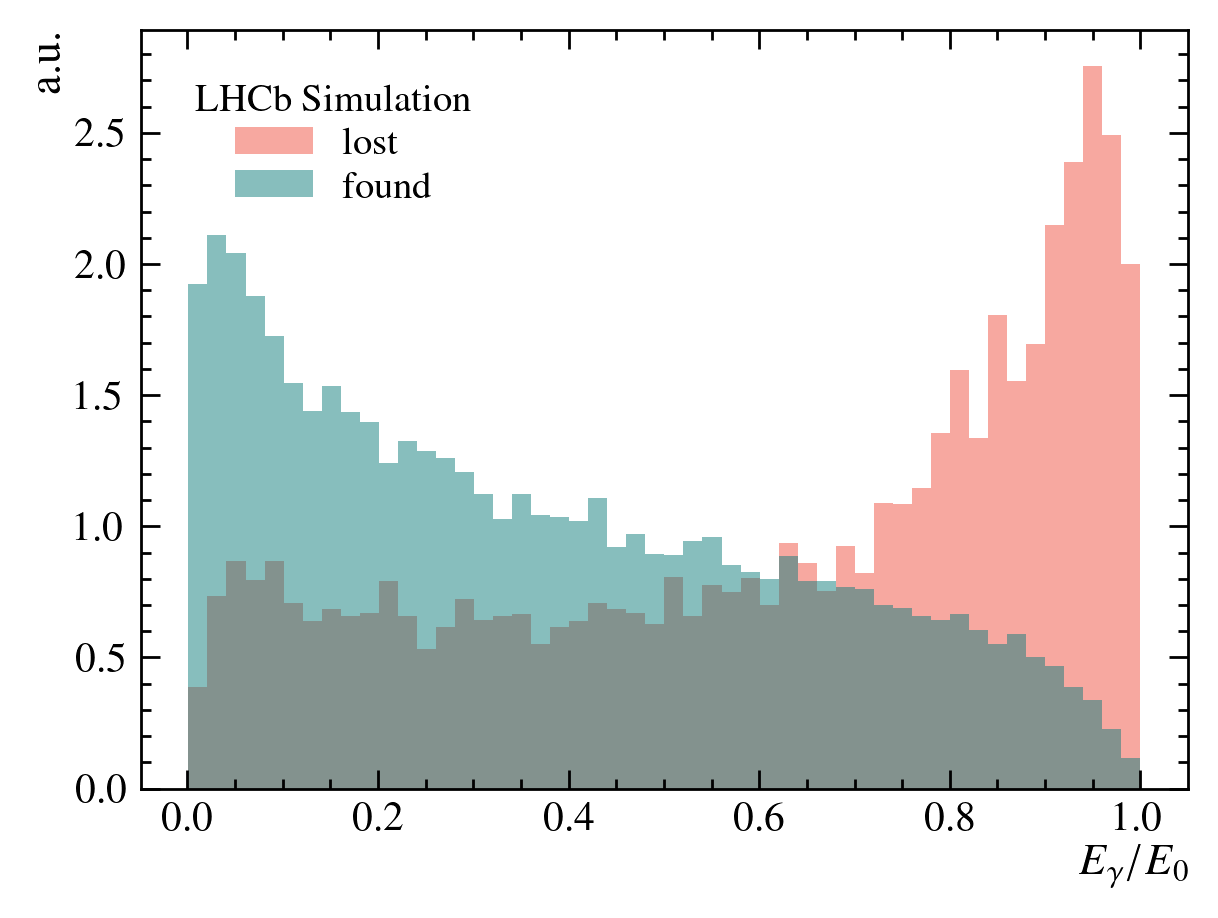

In [35]:
nbins = 50
plt.hist(
    ak.to_numpy(eloss_lost),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#F05342",
    label="lost",
    range=[0.001, 1],
)
# #2A9D8F another teal color
plt.hist(
    ak.to_numpy(eloss_found),
    bins=nbins,
    density=True,
    alpha=0.5,
    histtype="bar",
    color="#107E7D",
    label="found",
    range=[0.001, 1],
)

plt.xlabel(r"$E_\gamma/E_0$")
plt.ylabel("a.u.")
# plt.title(r'$B\rightarrow K^\ast ee$, $p>5$GeV, photons w/ brem_vtx_z$<9500$mm')
plt.legend(title="LHCb Simulation")

plt.savefig("/work/cetin/Projektpraktikum/thesis/emitted_energy.pdf", format="PDF")

In [27]:
# magnet kick position
input_tree = uproot.open(
    {
        "/work/cetin/Projektpraktikum/param_data_B_default.root": "PrParameterisationData_2ece6184.PrDebugTrackingTool/Tuple;1"
    }
)
array = input_tree.arrays()
array = array[array.isElectron & (array.fromB)]
array["dSlope_fringe"] = array["tx_ref"] - array["tx"]
array["z_mag_x_fringe"] = (
    array["x"]
    - array["x_ref"]
    - array["tx"] * array["z"]
    + array["tx_ref"] * array["z_ref"]
) / array["dSlope_fringe"]

(exptext: Custom Text(0.05, 0.95, 'LHCb'),
 expsuffix: Custom Text(0.05, 0.955, 'Simulation'))

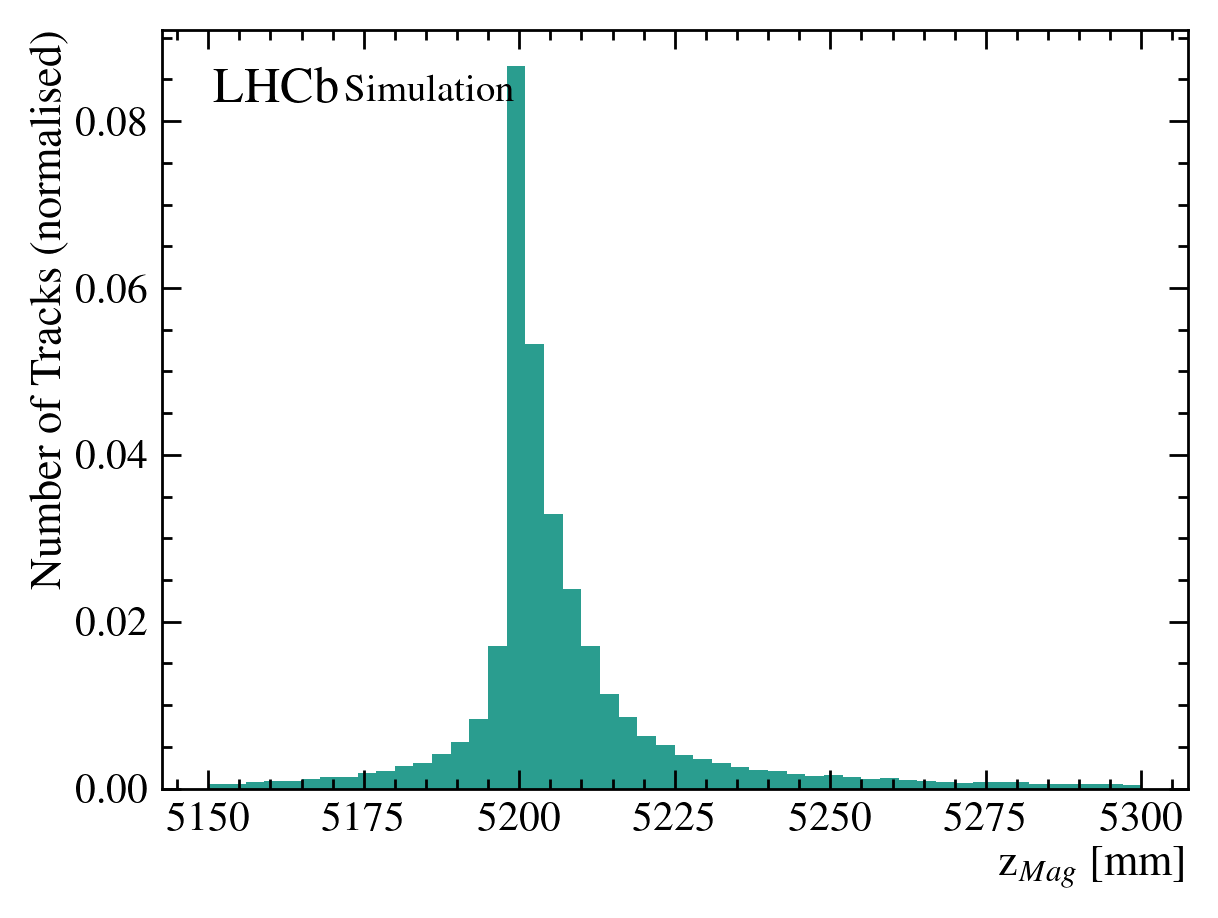

In [28]:
fig = plt.figure()
plt.hist(
    array["z_mag_x_fringe"], bins=50, range=[5150, 5300], color="#2A9D8F", density=True
)
plt.xlabel(r"z$_{Mag}$ [mm]")
plt.ylabel("Number of Tracks (normalised)")
mplhep.lhcb.text("Simulation")

In [29]:
ak.num(array, axis=0)

50501